Install imbalanced-learn library

In [1]:
!pip install imbalanced-learn

Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# For balancing data
from imblearn.over_sampling import SMOTE

# For splitting data
from sklearn.model_selection import train_test_split

# 5 ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# For accuracy
from sklearn.metrics import accuracy_score

import math

Load and inspect data

In [3]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url)

# Check the data
print("Dataset Shape:", df.shape)
print("\nClass Distribution (Before Balancing):")
print(df['Class'].value_counts())

Dataset Shape: (772, 31)

Class Distribution (Before Balancing):
Class
0    763
1      9
Name: count, dtype: int64


Visualize initial class imbalance

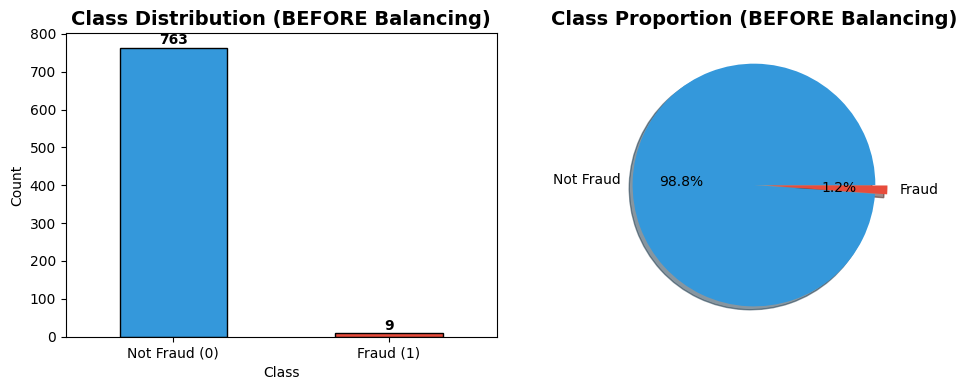


⚠️ The dataset is HIGHLY IMBALANCED - Fraud cases are very few!


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class imbalance BEFORE balancing
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
colors = ['#3498db', '#e74c3c']
df['Class'].value_counts().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Class Distribution (BEFORE Balancing)', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'], rotation=0)

# Add count labels on bars
for i, v in enumerate(df['Class'].value_counts()):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(df['Class'].value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%',
        colors=colors, explode=(0, 0.1), shadow=True)
plt.title('Class Proportion (BEFORE Balancing)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n⚠️ The dataset is HIGHLY IMBALANCED - Fraud cases are very few!")

```markdown
Balance data using SMOTE
```

In [4]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.concat([pd.DataFrame(X_balanced, columns=X.columns),
                          pd.DataFrame(y_balanced, columns=['Class'])], axis=1)

print("Balanced Dataset Shape:", df_balanced.shape)
print("\nClass Distribution (After Balancing):")
print(df_balanced['Class'].value_counts())

Balanced Dataset Shape: (1526, 31)

Class Distribution (After Balancing):
Class
0    763
1    763
Name: count, dtype: int64


```markdown
Visualize balanced class distribution
```

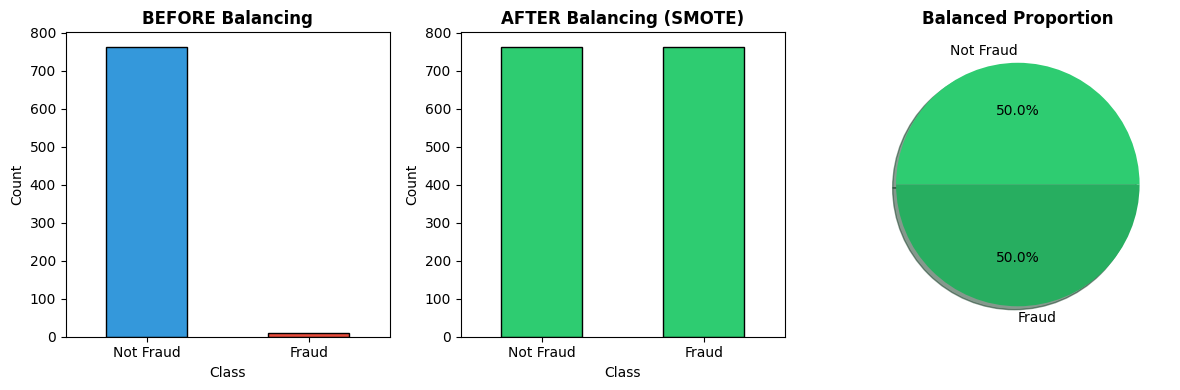

✅ Dataset is now BALANCED using SMOTE!


In [14]:
# Visualize class distribution AFTER balancing
plt.figure(figsize=(12, 4))

# Before vs After comparison
plt.subplot(1, 3, 1)
df['Class'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'], edgecolor='black')
plt.title('BEFORE Balancing', fontsize=12, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], rotation=0)

plt.subplot(1, 3, 2)
df_balanced['Class'].value_counts().plot(kind='bar', color=['#2ecc71', '#2ecc71'], edgecolor='black')
plt.title('AFTER Balancing (SMOTE)', fontsize=12, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], rotation=0)

plt.subplot(1, 3, 3)
plt.pie(df_balanced['Class'].value_counts(), labels=['Not Fraud', 'Fraud'],
        autopct='%1.1f%%', colors=['#2ecc71', '#27ae60'], shadow=True)
plt.title('Balanced Proportion', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Dataset is now BALANCED using SMOTE!")

Calculate required sample size

In [5]:
# Calculate sample size using formula: n = (Z^2 * p * (1-p)) / E^2
# Z = 1.96 (95% confidence), p = 0.5, E = 0.05 (5% margin of error)

Z = 1.96
p = 0.5
E = 0.05

sample_size = int(math.ceil((Z**2 * p * (1-p)) / (E**2)))
print(f"Calculated Sample Size: {sample_size}")

Calculated Sample Size: 385


Generate samples using techniques

In [6]:
# Function to create 5 different samples using different techniques

def get_samples(df, sample_size):
    samples = {}

    # Sampling 1: Simple Random Sampling
    samples['Simple_Random'] = df.sample(n=sample_size, random_state=42)

    # Sampling 2: Stratified Sampling
    samples['Stratified'], _ = train_test_split(df, train_size=sample_size,
                                                  stratify=df['Class'], random_state=42)

    # Sampling 3: Systematic Sampling
    step = len(df) // sample_size
    indices = list(range(0, len(df), step))[:sample_size]
    samples['Systematic'] = df.iloc[indices]

    # Sampling 4: Cluster Sampling (using Time as cluster)
    df_sorted = df.sort_values('Time')
    cluster_size = len(df) // 5
    cluster_idx = 2  # Pick middle cluster
    start_idx = cluster_idx * cluster_size
    cluster_data = df_sorted.iloc[start_idx:start_idx + cluster_size]
    samples['Cluster'] = cluster_data.sample(n=min(sample_size, len(cluster_data)), random_state=42)

    # Sampling 5: Bootstrap Sampling (with replacement)
    samples['Bootstrap'] = df.sample(n=sample_size, replace=True, random_state=42)

    return samples

# Create all 5 samples
samples = get_samples(df_balanced, sample_size)

print("5 Samples Created:")
for name, sample in samples.items():
    print(f"  {name}: {len(sample)} rows")

5 Samples Created:
  Simple_Random: 385 rows
  Stratified: 385 rows
  Systematic: 385 rows
  Cluster: 305 rows
  Bootstrap: 385 rows


Visualize sample class distribution

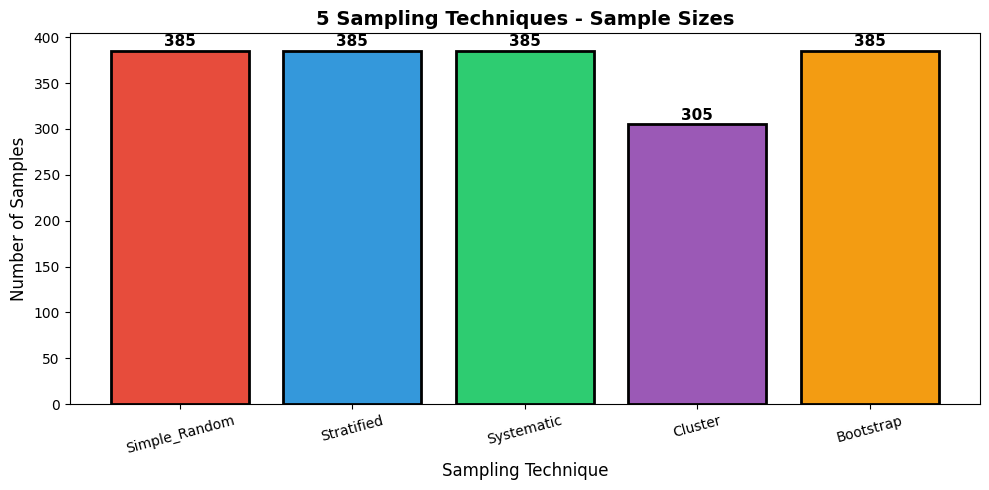


📊 Class Distribution in Each Sample:
--------------------------------------------------
Simple_Random        -> Class 0:  178, Class 1:  207
Stratified           -> Class 0:  192, Class 1:  193
Systematic           -> Class 0:  255, Class 1:  130
Cluster              -> Class 0:  174, Class 1:  131
Bootstrap            -> Class 0:  174, Class 1:  211


In [15]:
# Visualize the 5 samples
plt.figure(figsize=(10, 5))

sample_names = list(samples.keys())
sample_sizes = [len(sample) for sample in samples.values()]
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']

bars = plt.bar(sample_names, sample_sizes, color=colors, edgecolor='black', linewidth=2)

plt.title('5 Sampling Techniques - Sample Sizes', fontsize=14, fontweight='bold')
plt.xlabel('Sampling Technique', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=15)

# Add value labels on bars
for bar, size in zip(bars, sample_sizes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(size), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Also show class distribution in each sample
print("\n📊 Class Distribution in Each Sample:")
print("-" * 50)
for name, sample in samples.items():
    class_counts = sample['Class'].value_counts()
    print(f"{name:20} -> Class 0: {class_counts.get(0, 0):4}, Class 1: {class_counts.get(1, 0):4}")

Define machine learning models

In [7]:
# Define 5 different ML models
models = {
    'Logistic_Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision_Tree': DecisionTreeClassifier(random_state=42),
    'Random_Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient_Boosting': GradientBoostingClassifier(random_state=42)
}

print("5 Models Defined:")
for name in models.keys():
    print(f"  - {name}")

5 Models Defined:
  - Logistic_Regression
  - Decision_Tree
  - Random_Forest
  - SVM
  - Gradient_Boosting


Train models and record accuracy

In [8]:
# Create results table
results = pd.DataFrame(index=models.keys(), columns=samples.keys())

# Train each model on each sample
for sample_name, sample_data in samples.items():
    # Prepare X and y
    X_sample = sample_data.drop('Class', axis=1)
    y_sample = sample_data['Class']

    # Split into train and test (70-30 split)
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.3, random_state=42
    )

    # Train each model
    for model_name, model in models.items():
        # Create a fresh copy of the model
        model_copy = model.__class__(**model.get_params())

        # Train
        model_copy.fit(X_train, y_train)

        # Predict
        y_pred = model_copy.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred) * 100

        # Store result
        results.loc[model_name, sample_name] = round(accuracy, 2)

print("Training Complete!")

Training Complete!


Display accuracy results table

In [9]:
# Display the results table
print("\n" + "="*70)
print("ACCURACY TABLE: Sampling Techniques vs ML Models")
print("="*70)
print(results.to_string())
print("="*70)


ACCURACY TABLE: Sampling Techniques vs ML Models
                    Simple_Random Stratified Systematic Cluster Bootstrap
Logistic_Regression         87.07      91.38      89.66   86.96     95.69
Decision_Tree               93.97      93.97      98.28   86.96      93.1
Random_Forest               98.28      98.28      100.0   96.74     95.69
SVM                         59.48      68.97      73.28   53.26     67.24
Gradient_Boosting           96.55      95.69      98.28   93.48     94.83


Visualize accuracy with heatmap

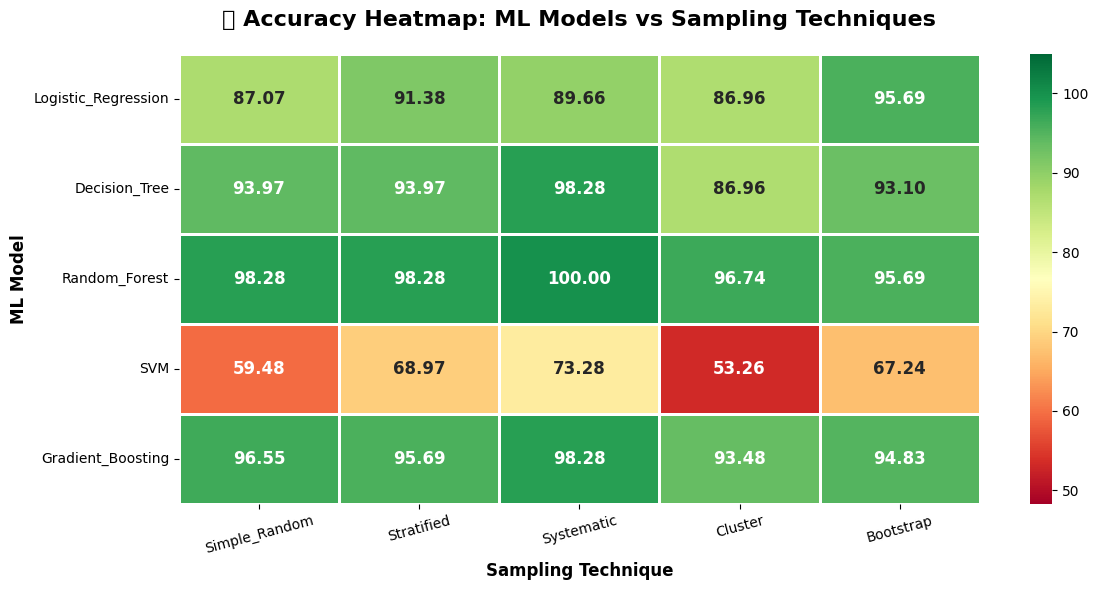


🟢 Green = Higher Accuracy | 🔴 Red = Lower Accuracy


In [16]:
# Create a beautiful heatmap of results
plt.figure(figsize=(12, 6))

# Convert results to float for heatmap
results_float = results.astype(float)

# Create heatmap
sns.heatmap(results_float, annot=True, fmt='.2f', cmap='RdYlGn',
            linewidths=2, linecolor='white',
            annot_kws={'size': 12, 'weight': 'bold'},
            vmin=results_float.min().min() - 5,
            vmax=results_float.max().max() + 5)

plt.title('🎯 Accuracy Heatmap: ML Models vs Sampling Techniques',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sampling Technique', fontsize=12, fontweight='bold')
plt.ylabel('ML Model', fontsize=12, fontweight='bold')
plt.xticks(rotation=15)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n🟢 Green = Higher Accuracy | 🔴 Red = Lower Accuracy")

Identify best sampling technique

In [10]:
# Find best sampling technique for each model
print("\n" + "="*70)
print("BEST SAMPLING TECHNIQUE FOR EACH MODEL")
print("="*70)

best_results = {}
for model_name in results.index:
    best_sample = results.loc[model_name].astype(float).idxmax()
    best_accuracy = results.loc[model_name].astype(float).max()
    best_results[model_name] = best_sample
    print(f"{model_name:25} -> {best_sample:20} (Accuracy: {best_accuracy}%)")

print("="*70)


BEST SAMPLING TECHNIQUE FOR EACH MODEL
Logistic_Regression       -> Bootstrap            (Accuracy: 95.69%)
Decision_Tree             -> Systematic           (Accuracy: 98.28%)
Random_Forest             -> Systematic           (Accuracy: 100.0%)
SVM                       -> Systematic           (Accuracy: 73.28%)
Gradient_Boosting         -> Systematic           (Accuracy: 98.28%)


Save results to CSV files

In [11]:
# Save results to CSV file
results.to_csv('sampling_results.csv')
print("\nResults saved to 'sampling_results.csv'")

# Also create a summary
summary = pd.DataFrame({
    'Model': list(best_results.keys()),
    'Best_Sampling_Technique': list(best_results.values())
})
summary.to_csv('best_sampling_summary.csv', index=False)
print("Summary saved to 'best_sampling_summary.csv'")


Results saved to 'sampling_results.csv'
Summary saved to 'best_sampling_summary.csv'


```markdown
Generate final results dashboard
```

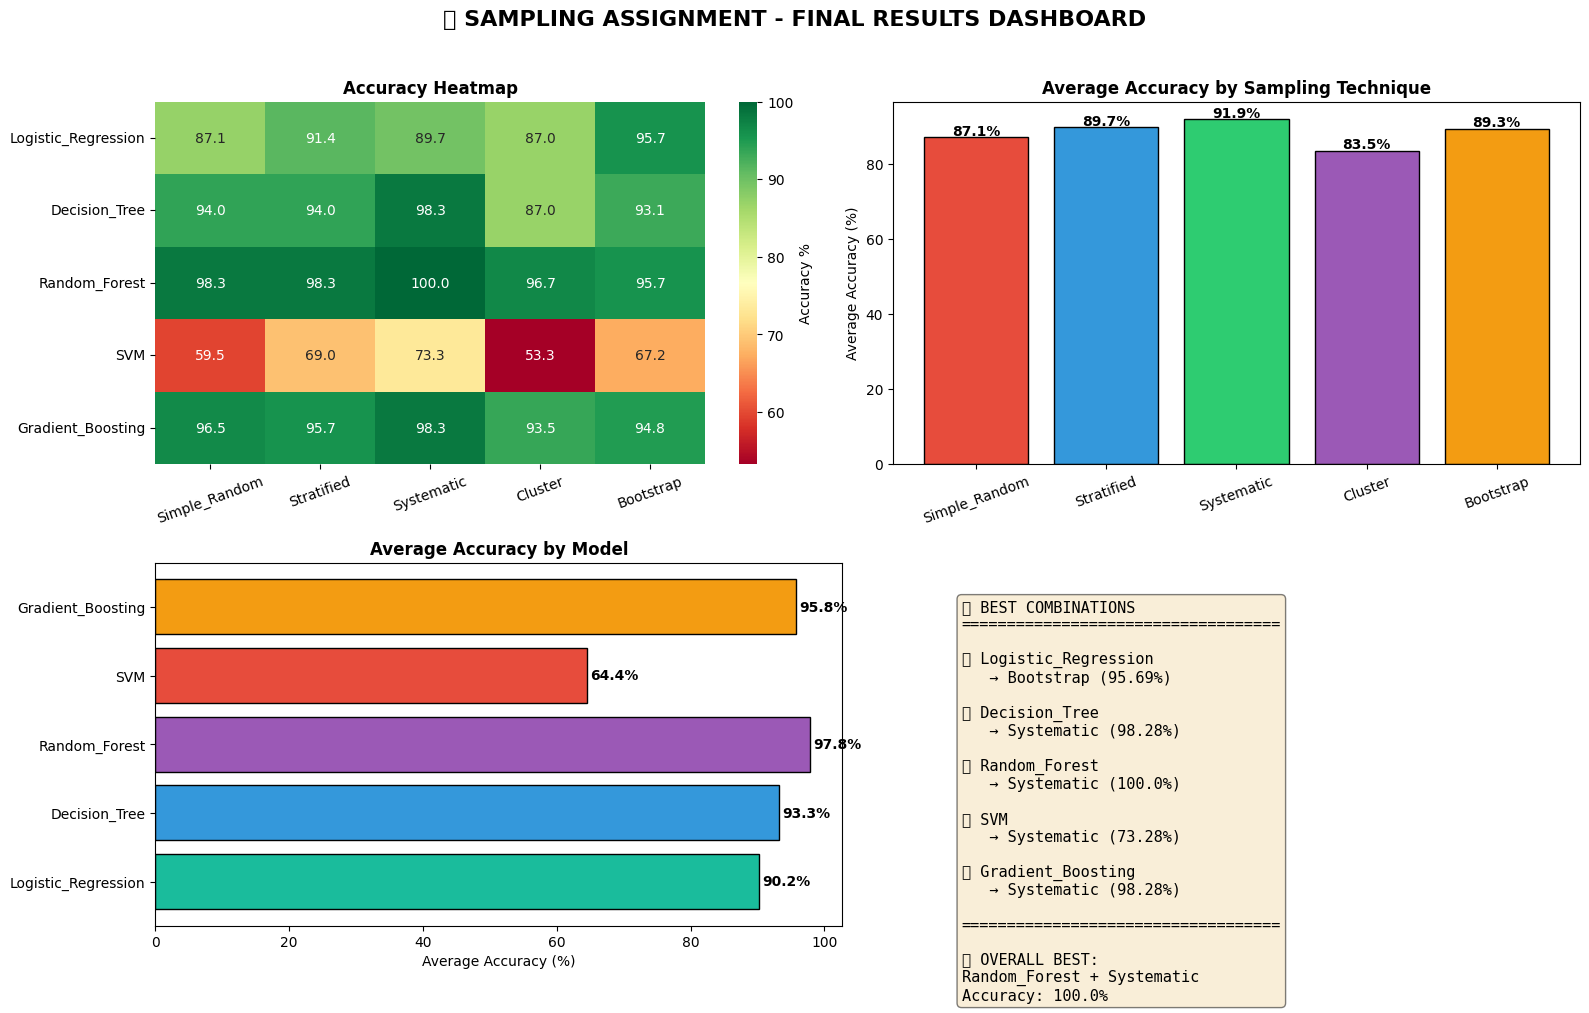


✅ Dashboard saved as 'final_results_dashboard.png'


In [17]:
# Final Summary Dashboard
fig = plt.figure(figsize=(16, 10))

# 1. Heatmap (top left)
ax1 = fig.add_subplot(2, 2, 1)
sns.heatmap(results.astype(float), annot=True, fmt='.1f', cmap='RdYlGn',
            ax=ax1, cbar_kws={'label': 'Accuracy %'})
ax1.set_title('Accuracy Heatmap', fontsize=12, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20)

# 2. Average accuracy by sampling technique (top right)
ax2 = fig.add_subplot(2, 2, 2)
avg_by_sampling = results.astype(float).mean()
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']
bars = ax2.bar(avg_by_sampling.index, avg_by_sampling.values, color=colors, edgecolor='black')
ax2.set_title('Average Accuracy by Sampling Technique', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Accuracy (%)')
ax2.tick_params(axis='x', rotation=20)
for bar, val in zip(bars, avg_by_sampling.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}%', ha='center', fontweight='bold')

# 3. Average accuracy by model (bottom left)
ax3 = fig.add_subplot(2, 2, 3)
avg_by_model = results.astype(float).mean(axis=1)
model_colors = ['#1abc9c', '#3498db', '#9b59b6', '#e74c3c', '#f39c12']
bars = ax3.barh(avg_by_model.index, avg_by_model.values, color=model_colors, edgecolor='black')
ax3.set_title('Average Accuracy by Model', fontsize=12, fontweight='bold')
ax3.set_xlabel('Average Accuracy (%)')
for bar, val in zip(bars, avg_by_model.values):
    ax3.text(val + 0.5, bar.get_y() + bar.get_height()/2,
             f'{val:.1f}%', va='center', fontweight='bold')

# 4. Best combinations (bottom right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.axis('off')

# Create summary text
summary_text = "🏆 BEST COMBINATIONS\n" + "="*35 + "\n\n"
for model, sampling in best_results.items():
    acc = results.loc[model, sampling]
    summary_text += f"✅ {model}\n   → {sampling} ({acc}%)\n\n"

# Find overall best
best_model = results.astype(float).max(axis=1).idxmax()
best_sampling_overall = results.loc[best_model].astype(float).idxmax()
best_acc = results.astype(float).max().max()
summary_text += "="*35 + f"\n\n🥇 OVERALL BEST:\n{best_model} + {best_sampling_overall}\nAccuracy: {best_acc}%"

ax4.text(0.1, 0.9, summary_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('📊 SAMPLING ASSIGNMENT - FINAL RESULTS DASHBOARD',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('final_results_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Dashboard saved as 'final_results_dashboard.png'")